<h2> Part 2 </h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1> CLASSIFICATION </h1>

Models selected for feature extraction are used with supervised learning algorithms to classify:-

1. Logistic Regression
2. Random Forest
3. Linear SVM
4. RBF SVM
5. Sigmoid SVM
6. Poly SVM

In [2]:

import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from scipy.spatial import distance
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
def dataExt(model, optimizer):
    # Load feature ext Data
    filesTrain = '/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/train_data_names.pkl'
    filesTest = '/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/test_data_names.pkl'
    #../input/feature-extracted/InceptionV3_features/InceptionV3_Adagrad_test.npy
    pathTrain = "/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/" + model + "_" + optimizer + "_train.npy"
    pathTest = "/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/" + model + "_" + optimizer + "_test.npy"
    
    # unload pickle the file names
    with open(filesTrain,'rb') as f:
        file_train_list = np.load(f, allow_pickle=True)
        
    with open(filesTest,'rb') as f:
        file_test_list = np.load(f, allow_pickle=True)
    # data preprocessing 
    file_train_list = [i[18:] for i in file_train_list]
    file_test_list = [i[17:] for i in file_test_list]
    
    feat_train_np = np.load(pathTrain)
    feat_test_np = np.load(pathTest)
    # return all the data of features of specific model
    return file_train_list, file_test_list, feat_train_np, feat_test_np

<h1> Logistic Regression </h1>

In [4]:
def LogReg(model, optimizer, X_train, y_train, X_test, y_test):
    print("Logistic Regression", model, optimizer)    
    # extract data using function made above
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
    #data preprocessing
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    #actual model of logistic regression from sklearn library
    Model = LogisticRegression()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    # check the accuracy p, r,f
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Random Forest </h1>

In [ ]:
def RandFor(model, optimizer, X_train, y_train, X_test, y_test):
    print("Logistic Regression", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = RandomForestClassifier()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Linear SVM </h1>

In [ ]:

def LinearSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("Linear SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='linear') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Rbf SVM </h1>

In [ ]:
def RbfSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("RBF SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='rbf') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Sigmoid SVM </h1>

In [ ]:
def SigmoidSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("Sigmoid SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='sigmoid') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Poly SVM </h1>

In [ ]:
def PolySVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("POLY SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='poly') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Classification Results </h1>

<h1> Logistic Regression Test </h1>

Logistic Regression vgg16_adam/VGG16 Adam
Acuracy 0.8946395563770795
P,R,F1: (0.9072717861011346, 0.8529239800056421, 0.8728061565667824, None)
CPU times: user 6.79 s, sys: 946 ms, total: 7.74 s
Wall time: 6.38 s


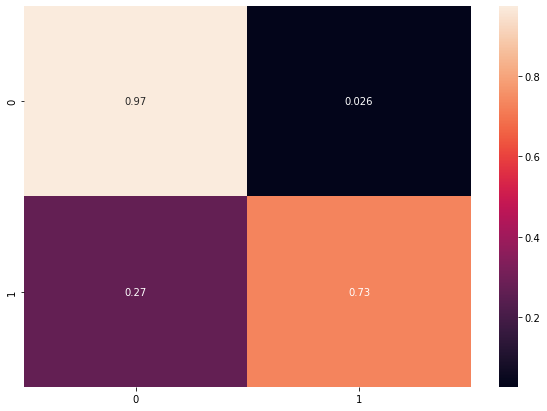

In [8]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LogReg('vgg16_adam/VGG16', 'Adam', X_train, y_train, X_test, y_test)


Logistic Regression vgg16_rmsprop/VGG16 RMSprop
Acuracy 0.9850805386849749
P,R,F1: (0.9809881660466983, 0.9857417877842232, 0.983303392620724, None)
CPU times: user 7.17 s, sys: 980 ms, total: 8.15 s
Wall time: 9.86 s


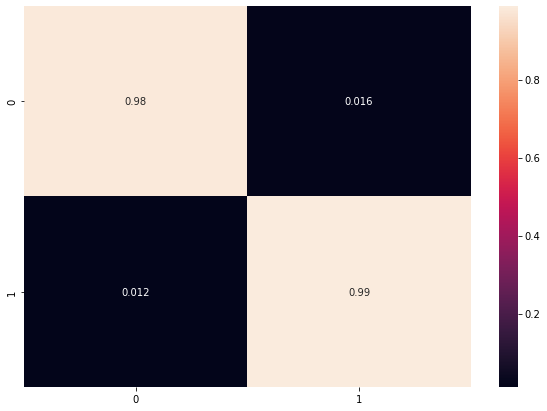

In [9]:

%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LogReg('vgg16_rmsprop/VGG16','RMSprop', X_train, y_train, X_test, y_test)


Logistic Regression inceptionv3_adam/InceptionV3 Adam
Acuracy 0.8894903617639293
P,R,F1: (0.8713520787526223, 0.8837701711645954, 0.8769373673113371, None)
CPU times: user 9.23 s, sys: 1.08 s, total: 10.3 s
Wall time: 13.4 s


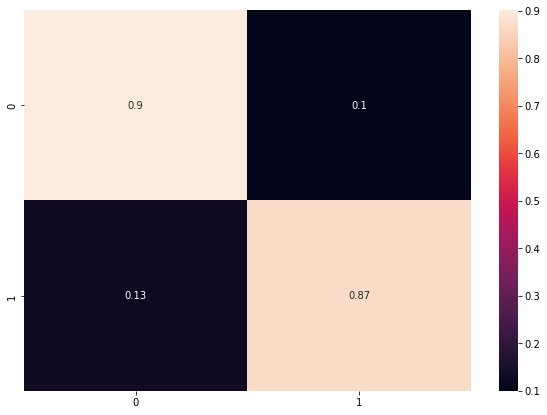

In [10]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LogReg('inceptionv3_adam/InceptionV3','Adam', X_train, y_train, X_test, y_test)


Logistic Regression inceptionv3_adagrad/InceptionV3 Adagrad
Acuracy 0.9911539477158701
P,R,F1: (0.9879318387949434, 0.9923741138487936, 0.9901002416423761, None)
CPU times: user 6.7 s, sys: 895 ms, total: 7.6 s
Wall time: 6.54 s


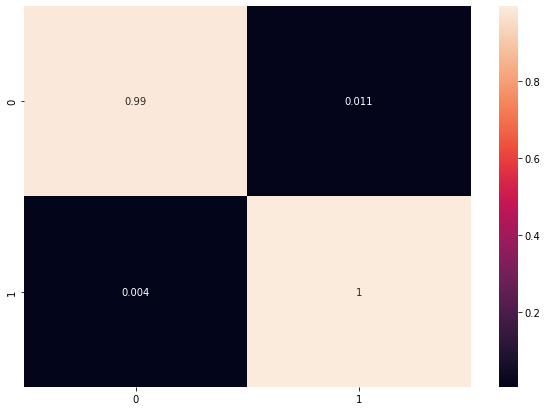

In [13]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LogReg('inceptionv3_adagrad/InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Random Forest </h1>

Logistic Regression vgg16_adam/VGG16 Adam
Acuracy 0.9930023765513599
P,R,F1: (0.9900909672986646, 0.9945080191383517, 0.9922435500025457, None)
CPU times: user 8.33 s, sys: 489 ms, total: 8.82 s
Wall time: 9.84 s


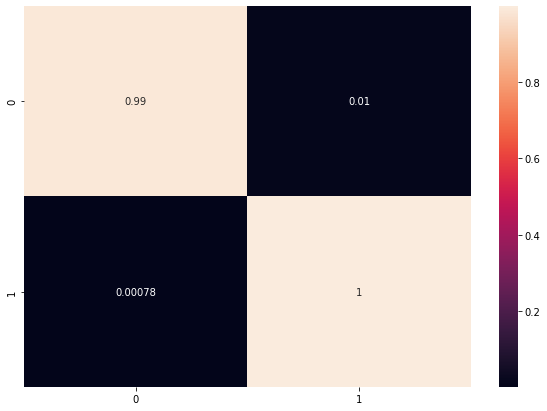

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('vgg16_adam/VGG16','Adam', X_train, y_train, X_test, y_test)

Logistic Regression vgg16_rmsprop/VGG16 RMSprop
Acuracy 0.995907050435701
P,R,F1: (0.9940521872601689, 0.9968993798759752, 0.9954531676206835, None)
CPU times: user 9.67 s, sys: 671 ms, total: 10.3 s
Wall time: 11.9 s


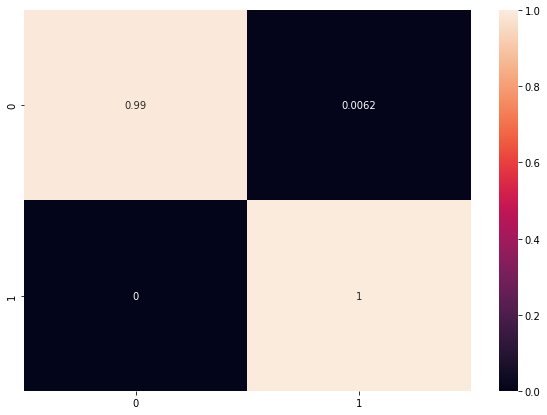

In [ ]:

%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('vgg16_rmsprop/VGG16','RMSprop', X_train, y_train, X_test, y_test)

Logistic Regression inceptionv3_adam/InceptionV3 Adam
Acuracy 0.9935304990757856
P,R,F1: (0.9908015311466687, 0.9949170110034499, 0.9928117384010146, None)
CPU times: user 6.63 s, sys: 332 ms, total: 6.96 s
Wall time: 8.57 s


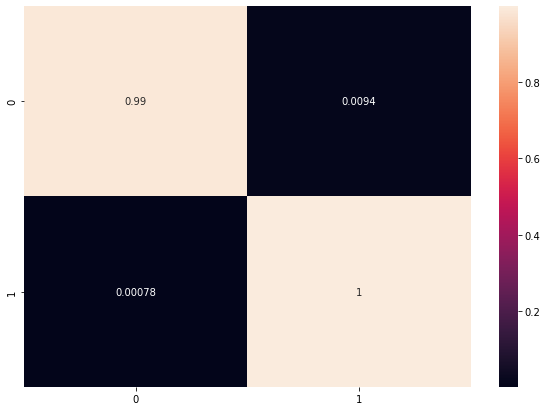

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('inceptionv3_adam/InceptionV3','Adam', X_train, y_train, X_test, y_test)

Logistic Regression inceptionv3_adagrad/InceptionV3 Adagrad
Acuracy 0.9916820702402958
P,R,F1: (0.9876081825334382, 0.9938174681059863, 0.9906158526407908, None)
CPU times: user 12.5 s, sys: 370 ms, total: 12.9 s
Wall time: 14.6 s


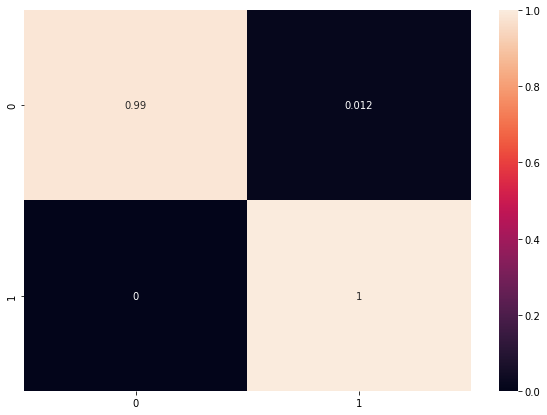

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('inceptionv3_adagrad/InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Linear SVM Test </h1>

Linear SVM vgg16_adam/VGG16 Adam
Acuracy 0.9248745709004489
P,R,F1: (0.9351203592356511, 0.8950178859500417, 0.9111911210533028, None)
CPU times: user 1min 2s, sys: 821 ms, total: 1min 3s
Wall time: 1min 7s


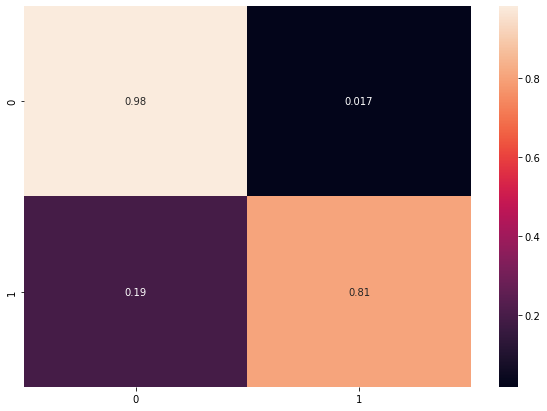

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('vgg16_adam/VGG16','Adam', X_train, y_train, X_test, y_test)

Linear SVM vgg16_rmsprop/VGG16 RMSprop
Acuracy 0.990493794560338
P,R,F1: (0.9859023315546327, 0.9928473599607759, 0.9892546825149302, None)
CPU times: user 35.6 s, sys: 388 ms, total: 36 s
Wall time: 35.9 s


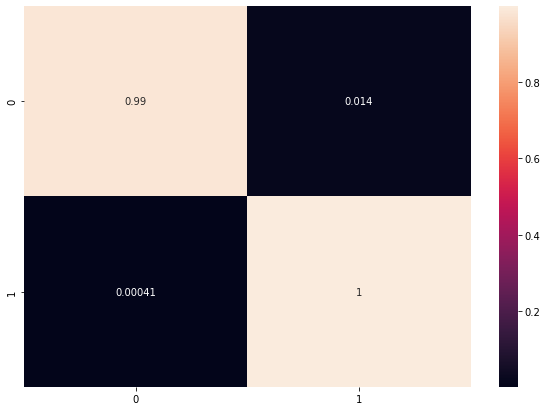

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('vgg16_rmsprop/VGG16','RMSprop', X_train, y_train, X_test, y_test)

Linear SVM inceptionv3_adam/InceptionV3 Adam
Acuracy 0.9288354898336414
P,R,F1: (0.9120406707164771, 0.9419765106463103, 0.9230245584441872, None)
CPU times: user 1min 10s, sys: 480 ms, total: 1min 11s
Wall time: 1min 13s


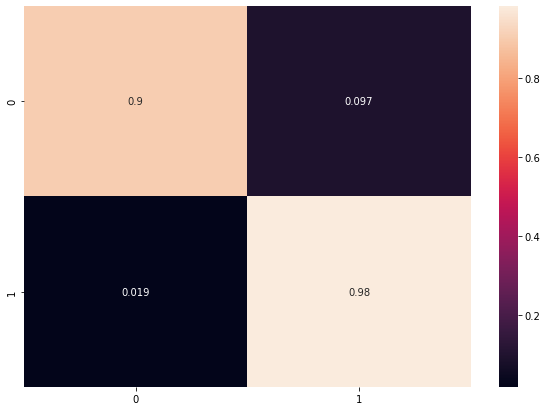

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('inceptionv3_adam/InceptionV3','Adam', X_train, y_train, X_test, y_test)

Linear SVM inceptionv3_adagrad/InceptionV3 Adagrad
Acuracy 0.9908898864536573
P,R,F1: (0.9875834499190972, 0.9919839899222701, 0.9897344653315796, None)
CPU times: user 16.2 s, sys: 320 ms, total: 16.5 s
Wall time: 17.8 s


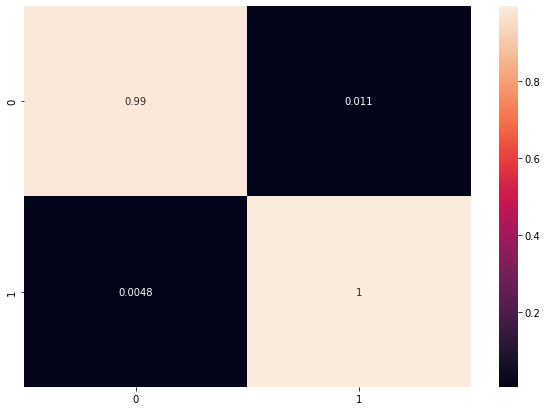

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('inceptionv3_adagrad/InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> RBF SVM Test </h1>

RBF SVM vgg16_adam/VGG16 Adam
Acuracy 0.7649854766305783
P,R,F1: (0.8422230975115181, 0.6556761114006273, 0.6637399814531862, None)
CPU times: user 1min 58s, sys: 520 ms, total: 1min 59s
Wall time: 2min 8s


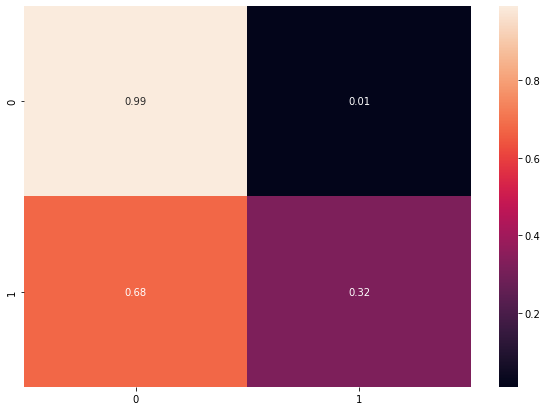

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('vgg16_adam/VGG16','Adam', X_train, y_train, X_test, y_test)

RBF SVM vgg16_rmsprop/VGG16 RMSprop
Acuracy 0.9864008449960391
P,R,F1: (0.9842425937580488, 0.9851134939489188, 0.9846760859297494, None)
CPU times: user 46.3 s, sys: 452 ms, total: 46.8 s
Wall time: 47.2 s


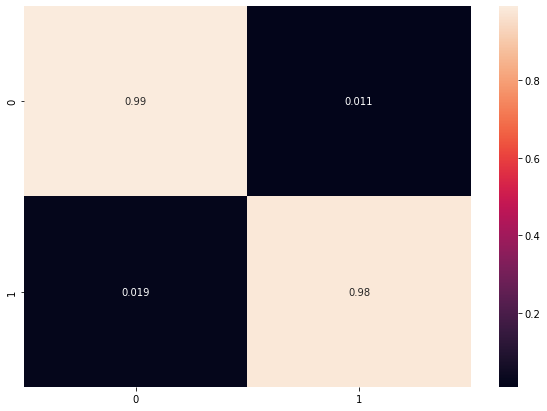

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('vgg16_rmsprop/VGG16','RMSprop', X_train, y_train, X_test, y_test)

RBF SVM inceptionv3_adam/InceptionV3 Adam
Acuracy 0.8769474518088196
P,R,F1: (0.8733999456523971, 0.8434880470925725, 0.8556714251353104, None)
CPU times: user 1min 13s, sys: 411 ms, total: 1min 14s
Wall time: 1min 14s


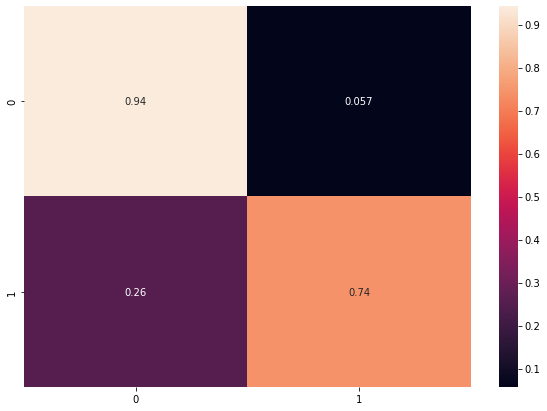

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('inceptionv3_adam/InceptionV3','Adam', X_train, y_train, X_test, y_test)

RBF SVM inceptionv3_adagrad/InceptionV3 Adagrad
Acuracy 0.9915500396091893
P,R,F1: (0.9876733436055469, 0.9936533121777072, 0.9905661376155646, None)
CPU times: user 25.7 s, sys: 353 ms, total: 26 s
Wall time: 25.9 s


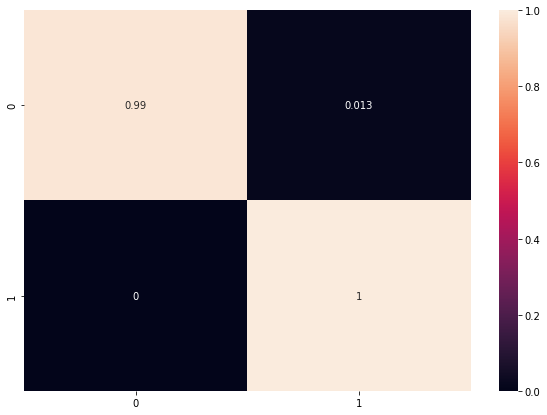

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('inceptionv3_adagrad/InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Sigmoid SVM Test </h1>

Sigmoid SVM vgg16_adam/VGG16 Adam
Acuracy 0.6888038024821759
P,R,F1: (0.6400147244641397, 0.6026391777273363, 0.6053445594147631, None)
CPU times: user 1min 44s, sys: 871 ms, total: 1min 45s
Wall time: 1min 53s


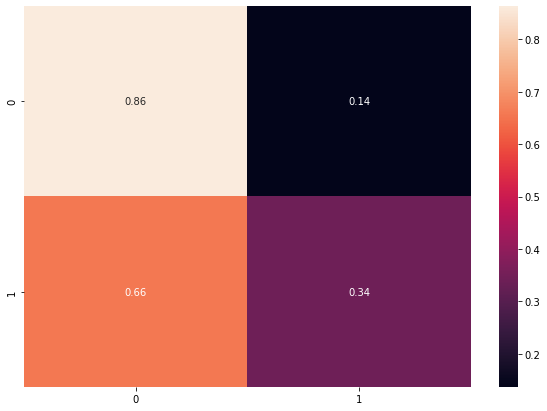

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('vgg16_adam/VGG16','Adam', X_train, y_train, X_test, y_test)

Sigmoid SVM vgg16_rmsprop/VGG16 RMSprop
Acuracy 0.6039081066807499
P,R,F1: (0.5526300414915805, 0.5526513003257904, 0.5526406252399522, None)
CPU times: user 1min 10s, sys: 401 ms, total: 1min 10s
Wall time: 1min 11s


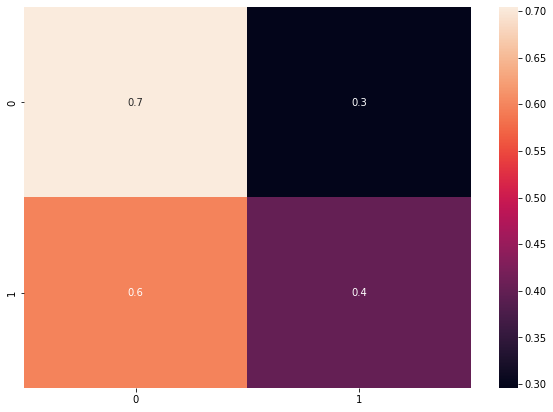

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('vgg16_rmsprop/VGG16','RMSprop', X_train, y_train, X_test, y_test)

Sigmoid SVM inceptionv3_adam/InceptionV3 Adam
Acuracy 0.532347504621072
P,R,F1: (0.47422671467615285, 0.4735321335059374, 0.4737171143672629, None)
CPU times: user 1min 18s, sys: 394 ms, total: 1min 19s
Wall time: 1min 19s


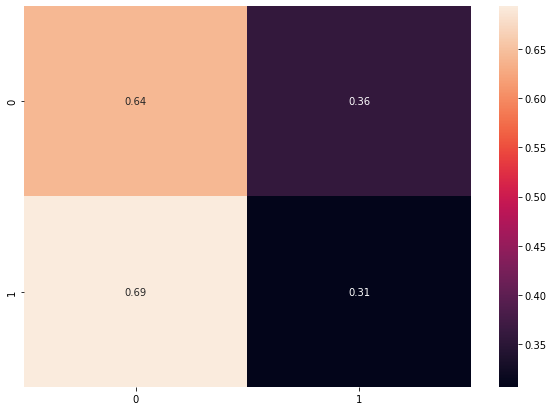

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('inceptionv3_adam/InceptionV3','Adam', X_train, y_train, X_test, y_test)

Sigmoid SVM inceptionv3_adagrad/InceptionV3 Adagrad
Acuracy 0.9739899656720359
P,R,F1: (0.9684771124646822, 0.9739579168513623, 0.97112698583754, None)
CPU times: user 21.3 s, sys: 358 ms, total: 21.7 s
Wall time: 21.6 s


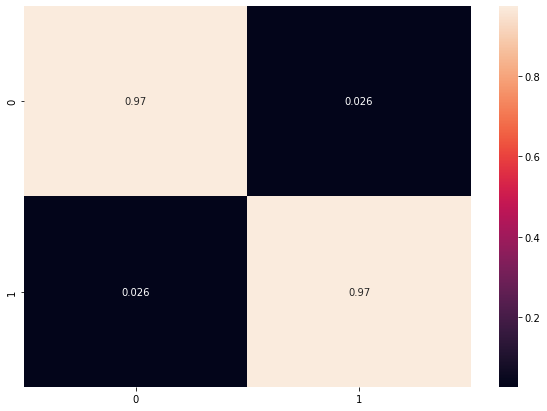

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('inceptionv3_adagrad/InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Poly SVM Test </h1>

POLY SVM vgg16_adam/VGG16 Adam
Acuracy 0.7998415632426723
P,R,F1: (0.8651932004101985, 0.7047969597425208, 0.7255815202932105, None)
CPU times: user 1min 30s, sys: 415 ms, total: 1min 30s
Wall time: 1min 36s


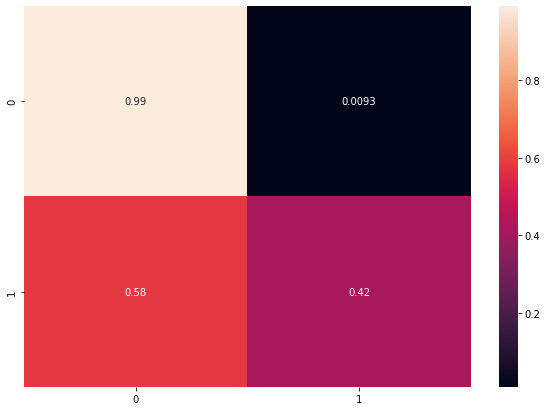

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('vgg16_adam/VGG16','Adam', X_train, y_train, X_test, y_test)

POLY SVM vgg16_rmsprop/VGG16 RMSprop
Acuracy 0.9646157908634804
P,R,F1: (0.9703298135077161, 0.9512639663758631, 0.959839448965881, None)
CPU times: user 36.8 s, sys: 369 ms, total: 37.2 s
Wall time: 37.8 s


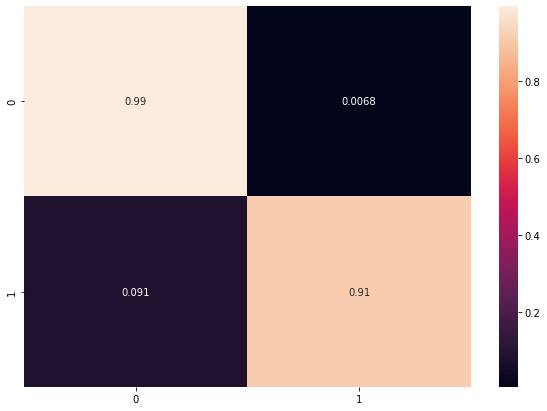

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('vgg16_rmsprop/VGG16','RMSprop', X_train, y_train, X_test, y_test)

POLY SVM inceptionv3_adam/InceptionV3 Adam
Acuracy 0.8692896752046475
P,R,F1: (0.8755941478207148, 0.8253578024007386, 0.8432706103079131, None)
CPU times: user 1min 5s, sys: 370 ms, total: 1min 5s
Wall time: 1min 5s


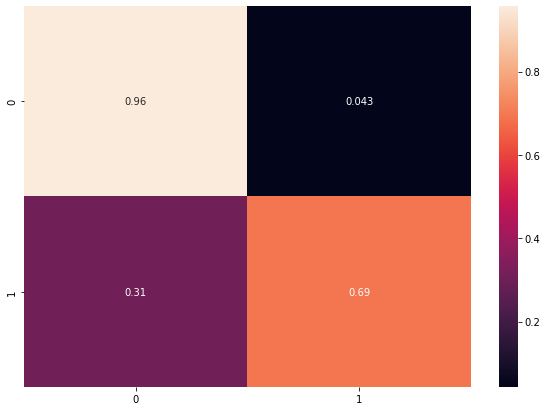

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('inceptionv3_adam/InceptionV3','Adam', X_train, y_train, X_test, y_test)

POLY SVM inceptionv3_adagrad/InceptionV3 Adagrad
Acuracy 0.9937945603379984
P,R,F1: (0.9906819984139572, 0.9953912531868994, 0.9929821354540633, None)
CPU times: user 16.3 s, sys: 357 ms, total: 16.7 s
Wall time: 16.6 s


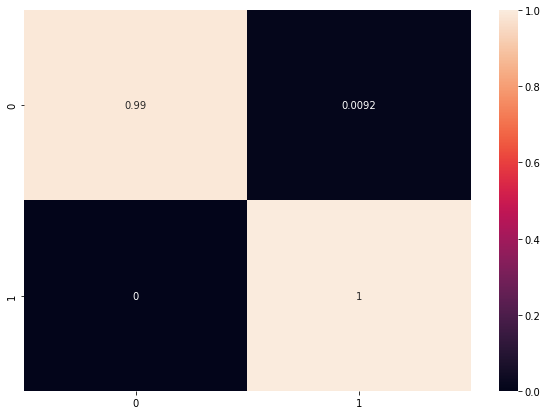

In [ ]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('inceptionv3_adagrad/InceptionV3','Adagrad', X_train, y_train, X_test, y_test)